# HMS Capstone - Exploratory Analysis 2
## By: AJ Goldstein (https://github.com/ajva1996)

### <span style="color:red">Analysis Goals: </span>
### 1) Investigate the <span style="color:red">distribution of mental health outcomes </span>(e.g. depression, anxiety) across the sample.
### 2) Investigate the <span style="color:red">interrelationship of mental health outcomes </span>(e.g. depression <-> anxiety) across the sample.
### 3) Investigate the <span style="color:red">correlational relationship</span> between mental health outcomes and psychological inflexibility.
### 4) Investigate the <span style="color:red">rate of mental illness</span> across the AAQ spectrum.

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("talk")

from IPython.display import Image, display
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ajva1996', api_key='R15DvcmyHWuyA74rNGYh')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP #0: Carry forward data from previous notebook

In [9]:
# cleaned dataset
%store -r HMS

# separated modules
%store -r HMS_ids
%store -r HMS_demo
%store -r HMS_mhstatus
%store -r HMS_mhhelp
%store -r HMS_aaq

# tidy variable groups
%store -r tidy_race
%store -r tidy_religion
%store -r tidy_degreeType
%store -r tidy_fieldOfStudy
%store -r tidy_activity
%store -r tidy_age
%store -r tidy_gender
%store -r tidy_relig

---------------------------------------------------------------------------------------------------------------------

## STEP #1: Mental Health Outcomes (distribution)

### Variables of Interest:
1) deprawsc = depression
- Patient Health Questionnaire 9: https://www.uspreventiveservicestaskforce.org/Home/GetFileByID/218
- <b>Score range: 0-27</b> (nine questions rated 0-3)
- A higher score represents a person with worse depressive symptoms

2) anx_score = anxiety
- Generalized Anxiety Disorder 7: http://carybehavioralhealth.com/wp-content/uploads/2011/06/Generalized-Anxiety-Scale.pdf
- <b>Score Range: 0-21</b> (seven questions rated 0-3)
- A higher score represents a person with worse anxiety symptoms

3) flourish = psychological well-being
- Diener's Flourishing Scale: http://www.cliveleach.com/strengths/the-flourishing-scale/
- <b>Score range: 8-56 </b> (eight questions rated 1-7)
- A high score represents a person with better psychological well-being (PWB)

---------------------------------------------------------------------------------------------------------------------

### 1) Depression (i.e. deprawsc)

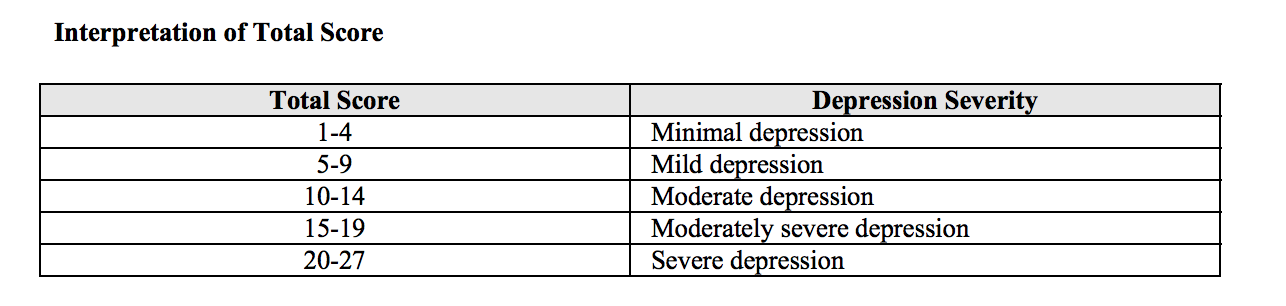

In [3]:
display(Image(filename='images/PHQ-9 Scale.png', embed=True, width=700))

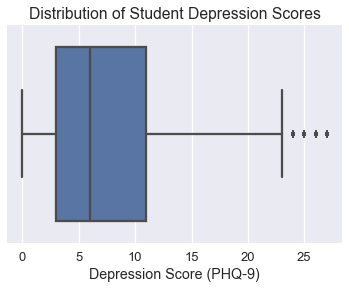

In [32]:
# birds' eye view
sns.boxplot(HMS.deprawsc.dropna());
plt.title('Distribution of Student Depression Scores')
plt.xlabel('Depression Score (PHQ-9)');

In [21]:
# summary statistics
HMS.deprawsc.dropna().describe()

count    37251.000000
mean         7.701216
std          5.806325
min          0.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         27.000000
Name: deprawsc, dtype: float64

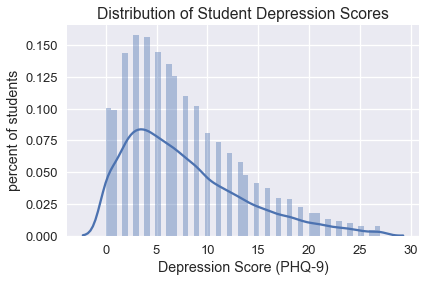

In [22]:
# detailed distribution
sns.distplot(HMS.deprawsc.dropna());
plt.title('Distribution of Student Depression Scores');
plt.xlabel('Depression Score (PHQ-9)')
plt.ylabel('percent of students')
plt.tight_layout(pad=1)
plt.savefig('PHQ9_dist.png')
plt.show()

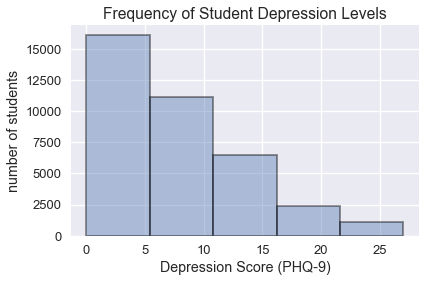

In [23]:
# bins represent depression severity levels
sns.distplot(HMS.deprawsc.dropna(), kde = False, bins = 5, hist_kws=dict(edgecolor="k", linewidth=2));
plt.title('Frequency of Student Depression Levels');
plt.xlabel('Depression Score (PHQ-9)')
plt.ylabel('number of students')
plt.tight_layout(pad=1)
plt.savefig('PHQ9_hist.png')
plt.show()

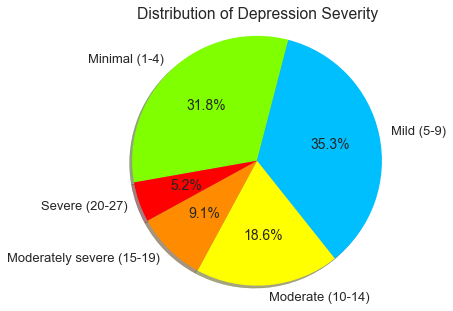

In [89]:
# pie chart of depression severity
dep = HMS.deprawsc.dropna()
labels = ['Minimal (1-4)', 'Mild (5-9)', 'Moderate (10-14)', 'Moderately severe (15-19)', 'Severe (20-27)']
dep_list = [round((x * 100), 2) for x in [len(dep[(dep >= 1) & (dep <= 4)])/len(dep),
                                          len(dep[(dep >= 5) & (dep <= 9)])/len(dep),
                                          len(dep[(dep >= 10) & (dep <= 14)])/len(dep),
                                          len(dep[(dep >= 15) & (dep <= 19)])/len(dep),
                                          len(dep[(dep >= 20) & (dep <= 27)])/len(dep)]]

colors = ['chartreuse', 'deepskyblue', 'yellow', 'darkorange', 'red']
fig = plt.pie(dep_list, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=190, shadow=True, counterclock = False)

fig = plt.gcf()
fig.set_size_inches(5,5)
plt.axis('equal')
plt.title('Distribution of Depression Severity')
plt.rcParams.update({'font.size': 14})
plt.savefig('PHQ9_pie.png')
plt.show()

### <span style="color:red">Key takeaways on college student depression scores</span>
- <span style="color:red"> the distribution of depression scores is fairly compact and right-skewed.
- <span style="color:red"> 25th percentile = 3.0 (minimal) // 50th percentile = 6.0 (mild) // 75th percentile = 11.0 (moderate) </span>


- <span style="color:red"> ~2/3 (67%) are minimally or mildly depressed</span>
- <span style="color:red"> ~1/5 (19%) are moderately depressed</span>
- <span style="color:red"> ~1/7 (14%) are severely depressed</span>

---------------------------------------------------------------------------------------------------------------------

### 2) Anxiety (i.e. anx_score)

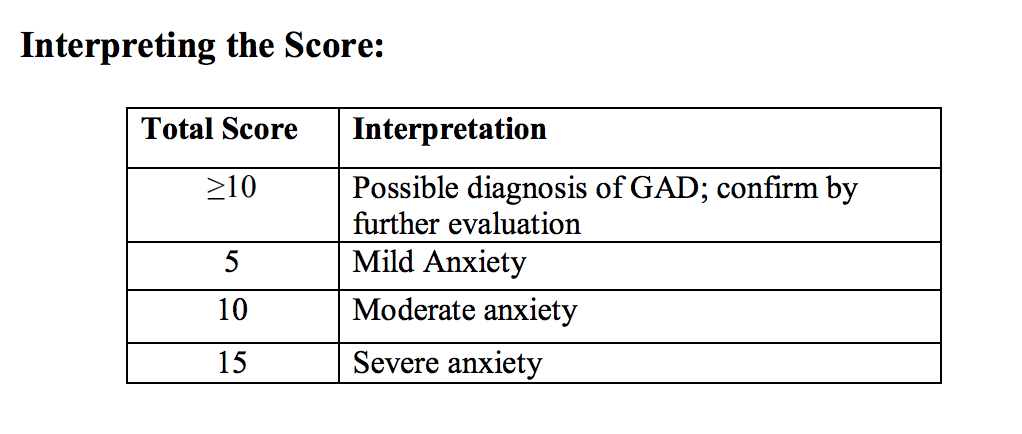

In [25]:
display(Image(filename='images/GAD-7 Scale.png', embed=True, width=450))

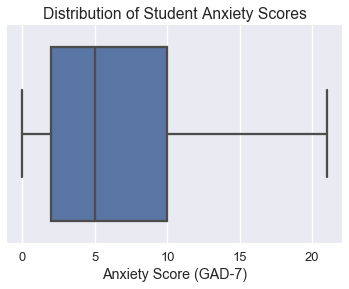

In [31]:
# birds' eye view
sns.boxplot(HMS.anx_score.dropna());
plt.title('Distribution of Student Anxiety Scores');
plt.xlabel('Anxiety Score (GAD-7)');

In [27]:
# summary statistics
HMS.anx_score.dropna().describe()

count    36868.000000
mean         6.707958
std          5.440851
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         21.000000
Name: anx_score, dtype: float64

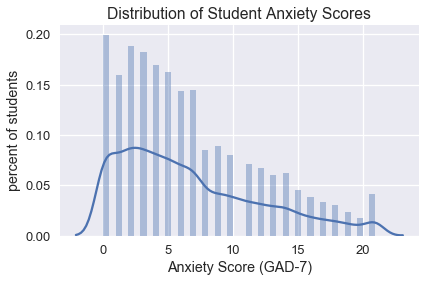

In [28]:
# detailed distribution
sns.distplot(HMS.anx_score.dropna());
plt.title('Distribution of Student Anxiety Scores');
plt.xlabel('Anxiety Score (GAD-7)')
plt.ylabel('percent of students')
plt.tight_layout(pad=1)
plt.savefig('GAD7_dist.png')
plt.show()

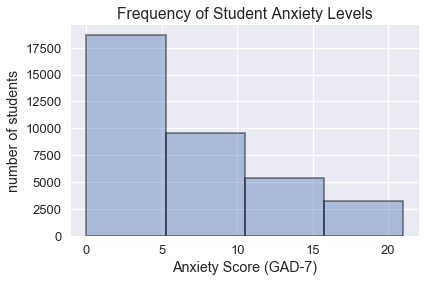

In [29]:
# bins represent anxiety severity levels
sns.distplot(HMS.anx_score.dropna(), kde = False, bins = 4, hist_kws=dict(edgecolor="k", linewidth=2));
plt.title('Frequency of Student Anxiety Levels');
plt.xlabel('Anxiety Score (GAD-7)')
plt.ylabel('number of students')
plt.tight_layout(pad=1)
plt.savefig('GAD7_hist.png')
plt.show()

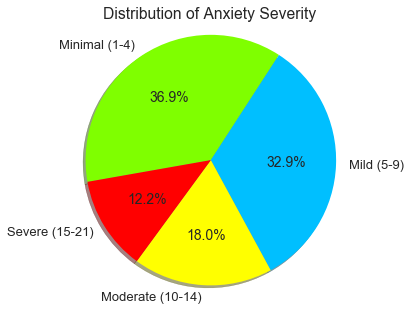

In [92]:
# pie chart of anxiety severity
anx = HMS.anx_score.dropna()
labels = ['Minimal (1-4)', 'Mild (5-9)', 'Moderate (10-14)', 'Severe (15-21)']
anx_list = [round((x * 100), 2) for x in [len(anx[(anx >= 1) & (anx <= 4)])/len(anx),
                                          len(anx[(anx >= 5) & (anx <= 9)])/len(anx),
                                          len(anx[(anx >= 10) & (anx <= 14)])/len(anx),
                                          len(anx[(anx >= 15) & (anx <= 21)])/len(anx)]]

colors = ['chartreuse', 'deepskyblue', 'yellow', 'red']
fig = plt.pie(anx_list, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=190, shadow=True, counterclock = False)

fig = plt.gcf()
fig.set_size_inches(5,5)
plt.axis('equal')
plt.title('Distribution of Anxiety Severity')
plt.savefig('GAD7_pie.png')
plt.rcParams.update({'font.size': 14})
plt.show()

### <span style="color:red">Key takeaways on college student anxiety scores</span>
- <span style="color:red"> the distribution of depression scores is moderately compact and right-skewed.
- <span style="color:red"> 25th percentile = 2.0 (minimal) // 50th percentile = 5.0 (mild) // 75th percentile = 10.0 (moderate) </span>


- <span style="color:red"> ~2/3 (70%) are minimally or mildly anxious</span>
- <span style="color:red"> ~1/5 (18%) are moderately anxious</span>
- <span style="color:red"> ~1/8 (12%) are severely anxious</span>

---------------------------------------------------------------------------------------------------------------------

### 3) Psychological Well-Being (i.e. flourish)

#### Interpreting the score:
- The Flourishing Scale measures the respondent’s self-perceived success in important areas such as relationships, self-esteem, purpose, and optimism.
- The scale provides a single psychological well-being score (8-56) and can be used to provide useful feedback for how to improve one’s life.
- <span style="color:red">Limitation: there is no real-world interpretability associated with ranges of scores.</span>

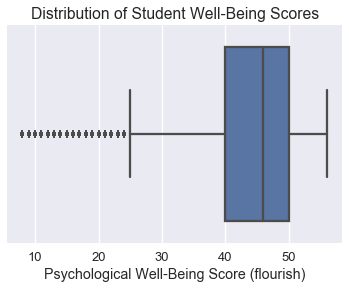

In [35]:
# birds' eye view
sns.boxplot(HMS.flourish.dropna());
plt.title('Distribution of Student Well-Being Scores');
plt.xlabel('Psychological Well-Being Score (flourish)');

In [36]:
# summary statistics
HMS.flourish.dropna().describe()

count    43016.000000
mean        44.127278
std          8.561844
min          8.000000
25%         40.000000
50%         46.000000
75%         50.000000
max         56.000000
Name: flourish, dtype: float64

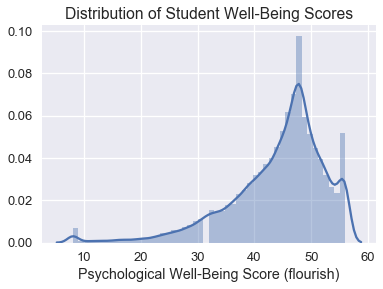

In [37]:
# detailed distribution
sns.distplot(HMS.flourish.dropna());
plt.title('Distribution of Student Well-Being Scores');
plt.xlabel('Psychological Well-Being Score (flourish)');

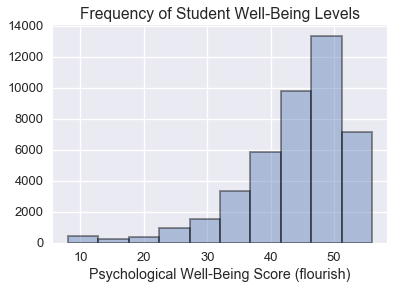

In [39]:
sns.distplot(HMS.flourish.dropna(), kde = False, bins = 10, hist_kws=dict(edgecolor="k", linewidth=2));
plt.title('Frequency of Student Well-Being Levels');
plt.xlabel('Psychological Well-Being Score (flourish)');

### <span style="color:red">Key takeaways on college student psychological well-being scores</span>
- <span style="color:red"> the distribution of scores is very compact and left-skewed.
- <span style="color:red"> 25th percentile = 40.0 (minimal) // 50th percentile = 46.0 (mild) // 75th percentile = 50.0 (moderate) </span>

---------------------------------------------------------------------------------------------------------------------

## STEP #2: Mental Health Outcomes (interrelationship)

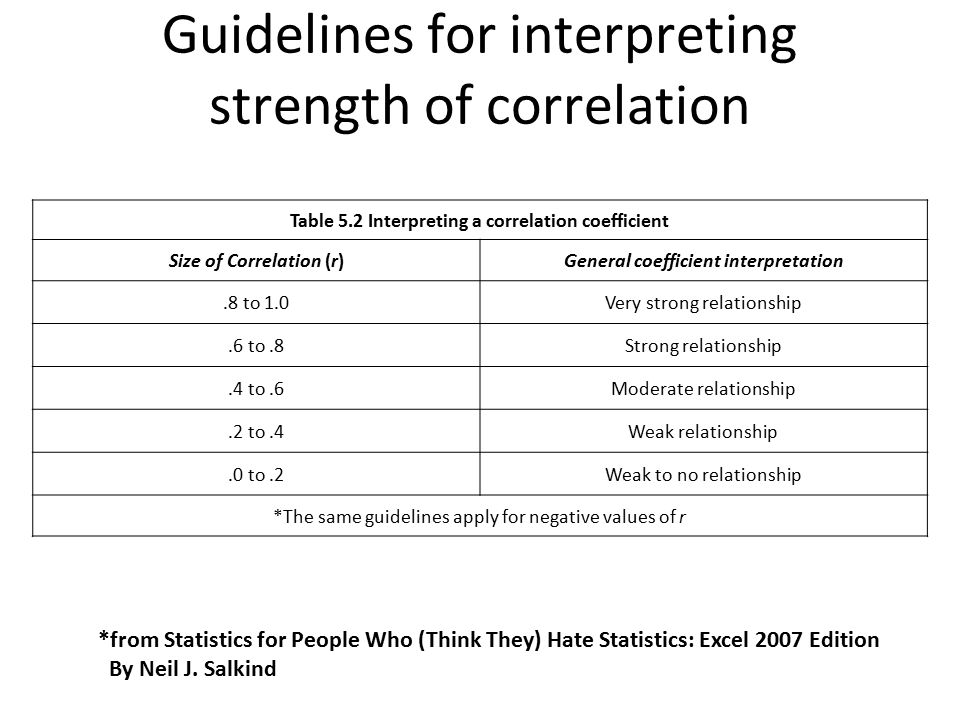

In [7]:
display(Image(filename='images/correlation_interpretation.jpg', embed=True, width=500))

### 1) Depression <-> Anxiety

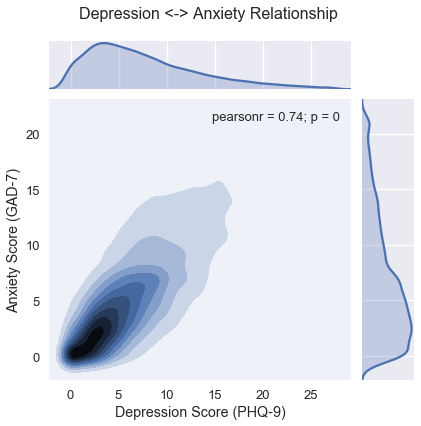

In [52]:
# kernal density estimate (KDE) with marginal distributions
plot = sns.jointplot(x = 'deprawsc', y = 'anx_score', data=HMS_mhstatus, kind = 'kde')
plot.set_axis_labels("Depression Score (PHQ-9)", "Anxiety Score (GAD-7)");
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Depression <-> Anxiety Relationship', fontsize=16)
plt.show()

### 2) Depression & Psychological Well-Being

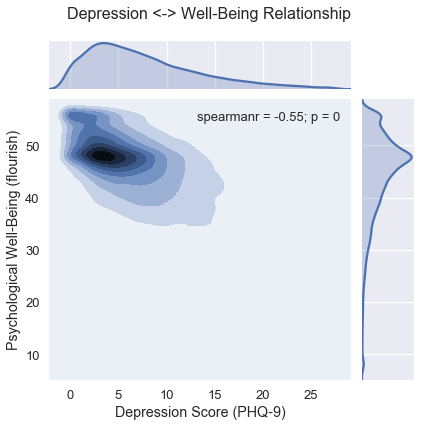

In [58]:
# same as above, now with spearman statistic rather than pearsonplot = 
plot = sns.jointplot(x = 'deprawsc', y = 'flourish', data=HMS_mhstatus, kind = 'kde', stat_func=spearmanr);
plot.set_axis_labels("Depression Score (PHQ-9)", "Psychological Well-Being (flourish)");
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Depression <-> Well-Being Relationship', fontsize=16)
plt.show()

### 3) Anxiety & Psychological Well-Being

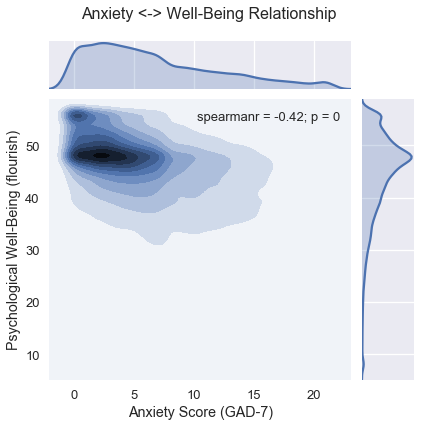

In [59]:
# same as #2 above (with spearman statistic)
plot = sns.jointplot(x = 'anx_score', y = 'flourish', data=HMS_mhstatus, kind = 'kde', stat_func=spearmanr);
plot.set_axis_labels("Anxiety Score (GAD-7)", "Psychological Well-Being (flourish)");
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Anxiety <-> Well-Being Relationship', fontsize=16)
plt.show()

### <span style="color:red">Key takeaways on interrelationships of mental health outcomes </span>
- Depression <-> Anxiety:
    - <span style="color:red">STRONG POSITIVE </span>linear relationship ( r = 0.74, p-value = 0 )
    
    
- Depression <-> Psychological Well-Being:
    - <span style="color:red"> MODERATE NEGATIVE </span> linear relationship ( r = -0.55, p-value = 0 )
    
    
- Anxiety <-> Psychological Well-Being:
    - <span style="color:red"> MODERATE NEGATIVE </span> linear relationship ( r = -0.42, p-value = 0 )
    
#### Note: I chose spearman statistic over pearson for the last two because of an apparent monotonic (non-linear) relationship

---------------------------------------------------------------------------------------------------------------------

## STEP #3: Psychological Inflexibility and Mental Health Outcomes

### 1) AAQ <-> Depression

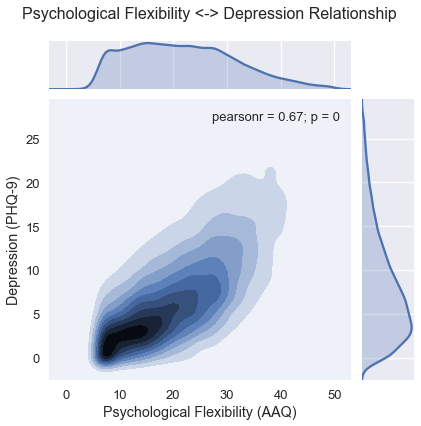

In [64]:
# kernal density estimate (KDE) with marginal distributions
plot = sns.jointplot(x = HMS_aaq.AAQ_total, y = HMS.deprawsc, kind='kde');
plot.set_axis_labels("Psychological Flexibility (AAQ)","Depression (PHQ-9)");
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Psychological Flexibility <-> Depression Relationship', fontsize=16)
plt.savefig('AAQ_PHQ9_joint.png')
plt.show()

### 2) AAQ <-> Anxiety

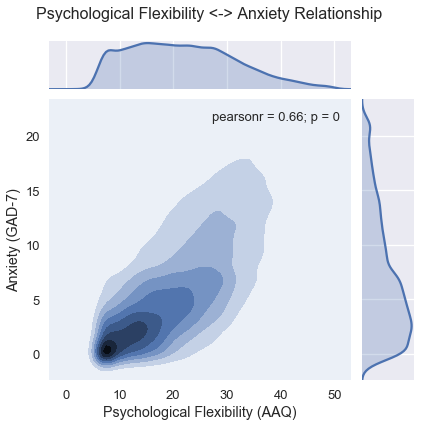

In [65]:
plot = sns.jointplot(x = HMS_aaq.AAQ_total, y = HMS.anx_score, kind='kde');
plot.set_axis_labels("Psychological Flexibility (AAQ)","Anxiety (GAD-7)");
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Psychological Flexibility <-> Anxiety Relationship', fontsize=16)
plt.savefig('AAQ_GAD7_joint.png')
plt.show()

### 3) AAQ <-> Well-Being

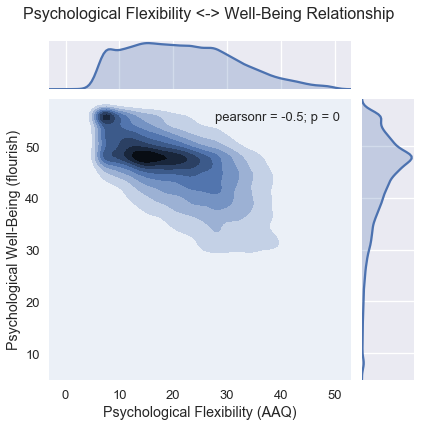

In [66]:
plot = sns.jointplot(x = HMS_aaq.AAQ_total, y = HMS.flourish, kind='kde');
plot.set_axis_labels("Psychological Flexibility (AAQ)","Psychological Well-Being (flourish)");
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Psychological Flexibility <-> Well-Being Relationship', fontsize=16)
plt.savefig('AAQ_flourish_joint.png')
plt.show()

### <span style="color:red">Key takeaways on correlationship relationships: </span>

- AAQ <-> Depression:
    - <span style="color:red">STRONG POSITIVE </span> linear relationship ( r = 0.67, p-value = 0 )
    
    
- AAQ <-> Anxiety:
    - <span style="color:red"> STRONG POSITIVE </span> linear relationship ( r = 0.66, p-value = 0 )
    
    
- AAQ <-> Well-Being:
    - <span style="color:red"> MODERATE NEGATIVE </span> linear relationship ( r = -0.5, p-value = 0 )
    
### <span style="color:green">Psychological Inflexibility (AAQ) appears to be a strong predictor of mental health outcomes in college students.</span>

## STEP #4: Rate of Mental Illness Across the AAQ Spectrum

### 1) Clinical Anxiety (anx_score >= 10)

In [145]:
# extract dataframe of deprawsc & AAQ scores
df = tidy_age[['deprawsc','AAQ_total']].dropna(how='any')
df.columns = ['deprawsc','AAQ']

# create different dataframes for each subset of AAQ scores
AAQ_1 = df[(df.AAQ >= 7) & (df.AAQ < 21)]
AAQ_2 = df[(df.AAQ >= 21) & (df.AAQ < 35)]
AAQ_3 = df[(df.AAQ >= 35) & (df.AAQ < 49)]

# calculate percent with depression in each
perDep_1 = len(AAQ_1[AAQ_1.deprawsc >=10])/len(AAQ_1)*100
perDep_2 = len(AAQ_2[AAQ_2.deprawsc >=10])/len(AAQ_2)*100
perDep_3 = len(AAQ_3[AAQ_3.deprawsc >=10])/len(AAQ_3)*100

# print depression rates
print('AAQ Score 7-21:',perDep_1,'% depressed')
print('AAQ Score 21-35:',perDep_2,'% depressed')
print('AAQ Score 35-49:',perDep_3,'% depressed')

('AAQ Score 7-21:', 10.781097615036794, '% depressed')
('AAQ Score 21-35:', 45.899723815593795, '% depressed')
('AAQ Score 35-49:', 85.40087754287994, '% depressed')


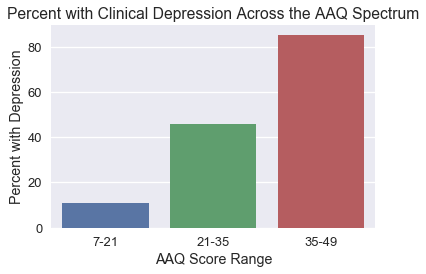

In [142]:
ax = sns.barplot(y=[perDep_1,perDep_2,perDep_3], x= ['7-21','21-35','35-49'])
plt.xlabel('AAQ Score Range')
plt.ylabel('Percent with Depression')
plt.title('Percent with Clinical Depression Across the AAQ Spectrum');
plt.tight_layout(pad=1)
plt.savefig('AAQ_PHQ9_bar')
plt.show()

### 2) Clinical Depression (deprawsc >= 10)

In [146]:
# extract dataframe of deprawsc & AAQ scores
df = tidy_age[['anx_score','AAQ_total']].dropna(how='any')
df.columns = ['anx_score','AAQ']

# create different dataframes for each subset of AAQ scores
AAQ_1 = df[(df.AAQ >= 7) & (df.AAQ < 21)]
AAQ_2 = df[(df.AAQ >= 21) & (df.AAQ < 35)]
AAQ_3 = df[(df.AAQ >= 35) & (df.AAQ < 49)]

# calculate percent with depression in each
perAnx_1 = len(AAQ_1[AAQ_1.anx_score >=10])/len(AAQ_1)*100
perAnx_2 = len(AAQ_2[AAQ_2.anx_score >=10])/len(AAQ_2)*100
perAnx_3 = len(AAQ_3[AAQ_3.anx_score >=10])/len(AAQ_3)*100

# print anxiety rates
print('AAQ Score 7-21:',perAnx_1,'% anxious')
print('AAQ Score 21-35:',perAnx_2,'% anxious')
print('AAQ Score 35-49:',perAnx_3,'% anxious')

('AAQ Score 7-21:', 8.253715498938428, '% anxious')
('AAQ Score 21-35:', 40.36978341257264, '% anxious')
('AAQ Score 35-49:', 79.84836392657621, '% anxious')


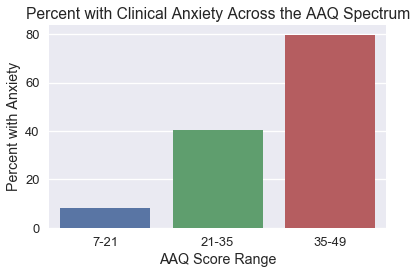

In [144]:
ax = sns.barplot(y=[perAnx_1,perAnx_2,perAnx_3], x= ['7-21','21-35','35-49'])
plt.xlabel('AAQ Score Range')
plt.ylabel('Percent with Anxiety')
plt.title('Percent with Clinical Anxiety Across the AAQ Spectrum');
plt.tight_layout(pad=1)
plt.savefig('AAQ_GAD7_bar')
plt.show()

## STEP #5: Pass variables to next Jupyter notebook

In [55]:
# cleaned dataset
%store HMS

# separated modules
%store HMS_ids
%store HMS_demo
%store HMS_mhstatus
%store HMS_mhhelp
%store HMS_aaq

# tidy variable groups
%store tidy_race
%store tidy_religion
%store tidy_degreeType
%store tidy_fieldOfStudy
%store tidy_activity
%store tidy_age
%store tidy_gender
%store tidy_relig

Stored 'HMS' (DataFrame)
Stored 'HMS_ids' (DataFrame)
Stored 'HMS_demo' (DataFrame)
Stored 'HMS_mhstatus' (DataFrame)
Stored 'HMS_mhhelp' (DataFrame)
Stored 'HMS_aaq' (DataFrame)
Stored 'tidy_race' (DataFrame)
Stored 'tidy_religion' (DataFrame)
Stored 'tidy_degreeType' (DataFrame)
Stored 'tidy_fieldOfStudy' (DataFrame)
Stored 'tidy_activity' (DataFrame)
Stored 'tidy_age' (DataFrame)
Stored 'tidy_gender' (DataFrame)
Stored 'tidy_relig' (DataFrame)


### Other

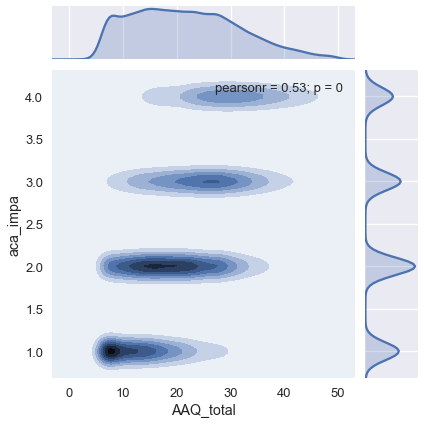

In [14]:
sns.jointplot(x = HMS_aaq.AAQ_total, y = HMS.aca_impa, kind='kde');